<a href="https://colab.research.google.com/github/Snargol/projet-IA-CESI/blob/main/Projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd

def load_data(name):
    csv_path = os.path.join("./"+name+".csv")
    return pd.read_csv(csv_path)

def load_final_data():
  general_data = load_data("general_data_full")
  employee_survey_data = load_data("employee_survey_data_full")
  manager_survey_data = load_data("manager_survey_data_full")
  temp_result = pd.merge(general_data,employee_survey_data,on='EmployeeID')
  result = pd.merge(temp_result,manager_survey_data,on='EmployeeID')
  return result.drop(columns=['EmployeeCount','StandardHours','Over18'])

columns_to_fill = ['NumCompaniesWorked','TotalWorkingYears','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance',]
binary_columns = ['Attrition','Gender']
nominal_columns = ['Department','EducationField','JobRole','MaritalStatus']
ordinal_columns =  [
    {
        "label":'BusinessTravel',
        "order":['Non-Travel','Travel_Rarely','Travel_Frequently']
    }
]
other_columns = ['Age', 'DistanceFromHome', ]


data = load_final_data()
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [3]:
def check_contains_nan(columns_to_fill):
  count_nan = 0
  for each in columns_to_fill:
    temp_count_nan = count_nan + data[each].isna().sum()
    count_nan= temp_count_nan
  return (count_nan != 0)

check_contains_nan(columns_to_fill)

True

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy="median")
data_num = data.select_dtypes(include=[np.number])
check_contains_nan(data_num)
imputer.fit(data_num)
data_num_filled = imputer.transform(data_num)
check_contains_nan(data_num_filled)

KeyError: "None of [Float64Index([    51.0,      6.0,      2.0,      1.0,      1.0, 131160.0,\n                   1.0,     11.0,      0.0,      1.0,      6.0,      1.0,\n                   0.0,      0.0,      3.0,      4.0,      2.0,      3.0,\n                   3.0],\n             dtype='float64')] are in the [columns]"

In [5]:
from itertools import groupby
import matplotlib.pyplot as plt

# we regroup by category with a count of the element
def groupBySameElements(list):
  toReturn = []
  for elem in list:
    if not any(elem in i for i in toReturn):
      toReturn.append((elem, list.count(elem)))
  return toReturn

# we get list of elements from a colmun of data
def getElemList(list):
  toReturn = []
  for i in data.MaritalStatus:
    toReturn.append(str(i))
  return toReturn

  # we get the index of the element in the list (by propertyname)
def findIndex(propertyName, elem, list):
  if list:
    i = 0
    for x in list:
      if x[propertyName] == elem:
        return i
      i += 1
  return -1

# we regroup by category with a count of the element and of the attrition
def groupBySameElementsTuple(list):
  toReturn = []
  for elem in list:
    index = findIndex('category', elem[0], toReturn)
    if index < 0:
      toAdd={}
      toAdd['category'], toAdd['count'], toAdd['countAttrition'] = elem[0], 1, 1
      toReturn.append(toAdd)
    else:
      if elem[1] == 'Yes':
        toReturn[index]['countAttrition'] += 1
      toReturn[index]['count'] += 1
  return toReturn

# we return list of elements by category and by number and attrition
def getElementCountAttrition(data):
  toReturn = []
  for i in data:
    toReturn.append(i)
  return toReturn

# we display the details with the correct percent (sorted)
# listExample = [{'category': 'Sales', 'count': 1338, 'countAttrition': 202}]
def printList(list):
  newlist = sorted(list, key=lambda x: ((x['countAttrition'] / x['count']) * 100), reverse=True)
  for elem in newlist:
    print('   ',elem['category'], ' : ', round((elem['countAttrition'] / elem['count']) * 100), '%', '(', elem['countAttrition'], '/', elem['count'], ')')

def drawGraph(labels, data):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  labels, percents = labels, data
  ax.bar(labels,percents)
  plt.show()

def drawColumn(columnName):
  listTuples = getElementCountAttrition(zip(data[columnName], data.Attrition))
  list = groupBySameElementsTuple(listTuples)
  print('\n\n\n', columnName)

  labels = []
  percents = []
  for elem in list:
    labels.append(elem['category'])
    percents.append((elem['countAttrition'] / elem['count']) * 100)
  printList(list)

  drawGraph(labels, percents)




 Department
    Human Resources  :  31 % ( 58 / 189 )
    Research & Development  :  16 % ( 453 / 2883 )
    Sales  :  15 % ( 202 / 1338 )


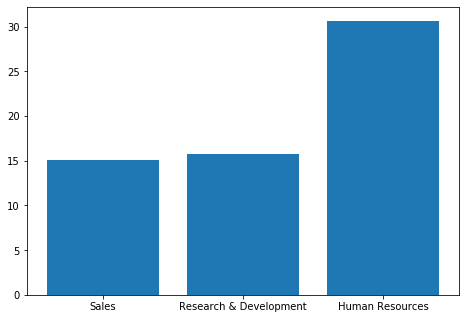




 EducationField
    Human Resources  :  42 % ( 34 / 81 )
    Life Sciences  :  17 % ( 304 / 1818 )
    Medical  :  16 % ( 226 / 1392 )
    Marketing  :  16 % ( 76 / 477 )
    Other  :  13 % ( 31 / 246 )
    Technical Degree  :  12 % ( 46 / 396 )


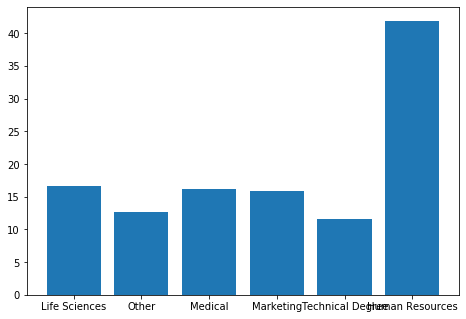




 JobRole
    Research Director  :  24 % ( 58 / 240 )
    Research Scientist  :  18 % ( 159 / 876 )
    Sales Executive  :  17 % ( 166 / 978 )
    Laboratory Technician  :  16 % ( 127 / 777 )
    Sales Representative  :  15 % ( 37 / 249 )
    Healthcare Representative  :  15 % ( 58 / 393 )
    Human Resources  :  14 % ( 22 / 156 )
    Manager  :  14 % ( 43 / 306 )
    Manufacturing Director  :  11 % ( 49 / 435 )


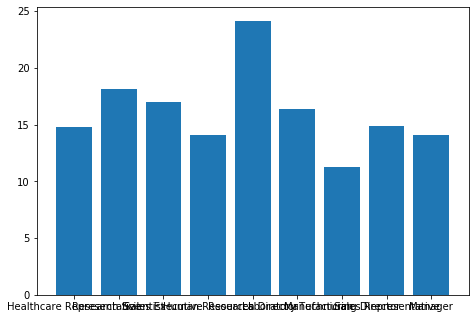




 MaritalStatus
    Single  :  26 % ( 360 / 1410 )
    Married  :  13 % ( 253 / 2019 )
    Divorced  :  10 % ( 100 / 981 )


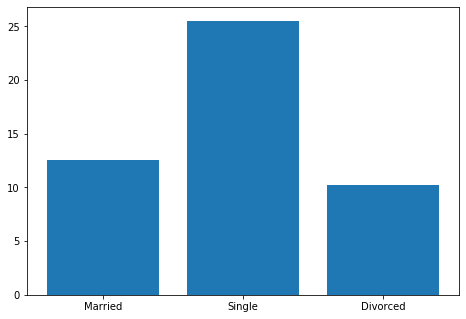




 NumCompaniesWorked
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    5.0  :  25 % ( 47 / 187 )
    9.0  :  24 % ( 37 / 156 )
    6.0  :  24 % ( 49 / 208 )
    7.0  :  23 % ( 52 / 222 )
    1.0  :  19 % ( 294 / 1558 )
    8.0  :  13 % ( 19 / 147 )
    4.0  :  12 % ( 51 / 415 )
    0.0  :  12 % ( 69 / 586 )
    2.0  :  11 % ( 48 / 438 )
    3.0  :  10 % ( 49 / 474 )


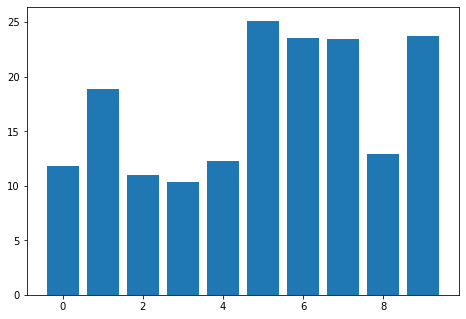




 TotalWorkingYears
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    40.0  :  100 % ( 6 / 6 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    1.0  :  50 % ( 120 / 242 )
    0.0  :  45 % ( 15 / 33 )
    38.0  :  33 % ( 1 / 3 )
    2.0  :  30 % ( 28 / 93 )
    34.0  :  27 % ( 4 / 15 )
    7.0  :  23 % ( 55 / 243 )
    3.0  :  22 % ( 28 / 126 )
    11.0  :  21 % ( 22 / 106 )
    4.0  :  20 % ( 37 / 189 )
    33.0  :  19 % ( 4 / 21 )
    5.0  :  19 % ( 49 / 264 )
    24.0  :  19 % ( 10 / 54 )
    6.0  :  18 % ( 66 / 375 )
    18.0  :  16 % ( 13 / 81 )
    8.0  :  16 % ( 48 / 307 )
    31.0  :  15 % ( 4 / 27 )
    14.0  :  14 % ( 13 / 93 )
    19.0  :  14 % ( 9 / 66 )
    15.0  :  13 % ( 16 / 120 )
    10.0  :  13 % ( 76 / 605 )
    22.0  :  11 % ( 7 / 62 )
    12.0  :  11 % ( 16 / 144 )
    35.0  :  11 % ( 1 / 9 )
    9.0  :  1

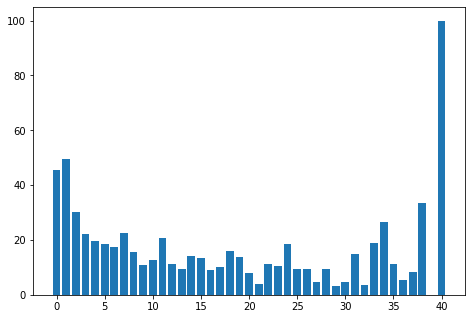




 EnvironmentSatisfaction
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    1.0  :  25 % ( 213 / 845 )
    2.0  :  15 % ( 129 / 856 )
    3.0  :  14 % ( 187 / 1350 )
    4.0  :  13 % ( 180 / 1334 )


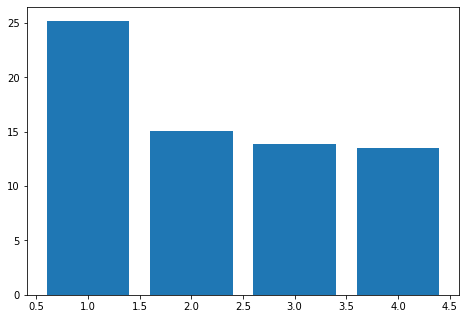




 JobSatisfaction
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    1.0  :  23 % ( 198 / 860 )
    3.0  :  17 % ( 219 / 1323 )
    2.0  :  16 % ( 138 / 840 )
    4.0  :  11 % ( 157 / 1367 )


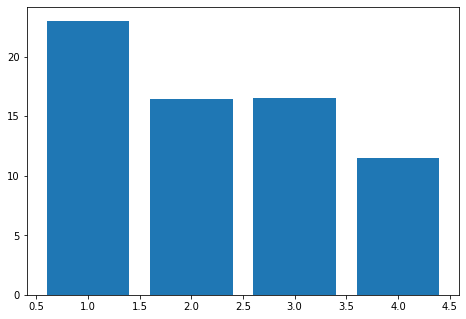




 WorkLifeBalance
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )
    nan  :  100 % ( 1 / 1 )


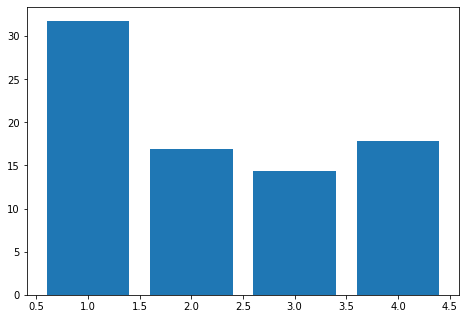

In [6]:
for columnName in nominal_columns:
  drawColumn(columnName)

for columnName in columns_to_fill:
  columnName
  drawColumn(columnName)
